In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
data=pd.read_csv("Mall_Customers.csv")

In [47]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [48]:
data.tail()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [50]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [51]:
data.drop(["CustomerID", "Gender"], axis=1, inplace=True)

data.head()

In [52]:
data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


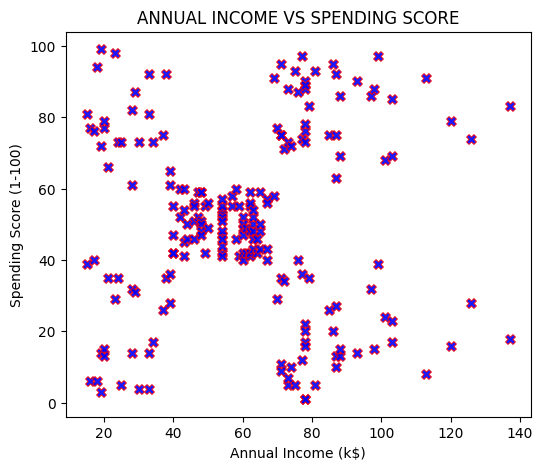

In [53]:
#EDA
# ANNUAL INCOME VS SPENDING SCORE USING SCATTER PLOT
plt.figure(figsize=(6,5))
sns.scatterplot(x=data["Annual Income (k$)"],y=data["Spending Score (1-100)"], color="blue",edgecolors="red", alpha=0.9,linewidths=0.7, marker ="X",s=50)
plt.title("ANNUAL INCOME VS SPENDING SCORE")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

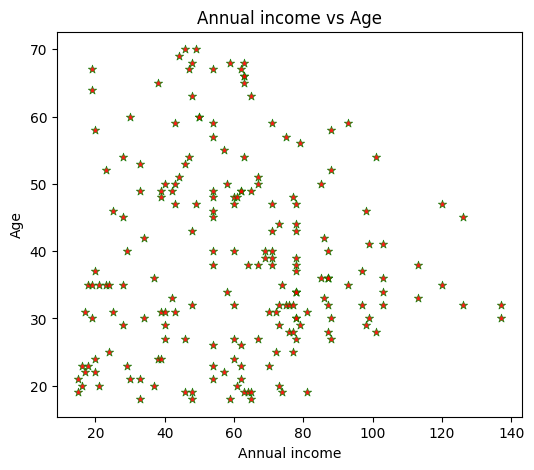

In [54]:
plt.figure(figsize=(6,5))
sns.scatterplot(x="Annual Income (k$)",y="Age",data=data
                ,color="red"
                ,edgecolor="green"
                ,alpha=0.9
                ,linewidths=0.5
                ,marker="*"
                ,s=40)
plt.title("Annual income vs Age")
plt.xlabel("Annual income")
plt.ylabel("Age")
plt.show()

In [55]:
#Standard scalar
from sklearn.preprocessing import StandardScaler
# load the model
scaler = StandardScaler()
#fit model
scale_data=scaler.fit_transform(data)
scale_data

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [56]:
 #convert scaled_data array into datframe
dta=pd.DataFrame(scale_data , columns= data.columns)
data

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [57]:
# train the model 
from sklearn.cluster import KMeans
#Load the model
cluster =KMeans(n_clusters=4, random_state=42)
#Train the model
cluster.fit(data)
#display the model
cluster.labels_
              

array([2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [58]:
data["Cluster"]=model.labels_
data.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,8
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,8


In [59]:
data["Cluster"].value_counts()

Cluster
0    48
6    37
5    25
2    23
3    20
4    12
8    11
1    11
7    10
9     3
Name: count, dtype: int64

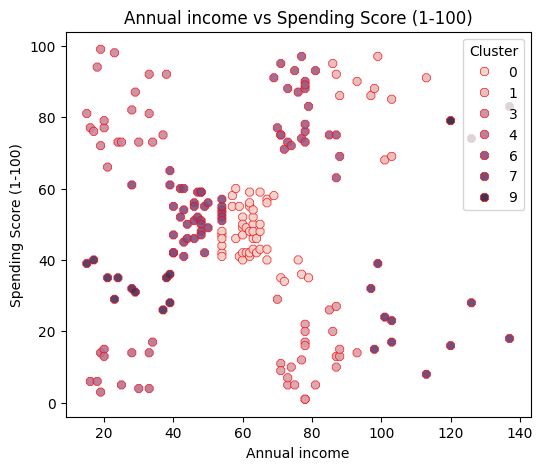

In [60]:
# display clusters
plt.figure(figsize=(6,5))
sns.scatterplot(x="Annual Income (k$)"
                ,y="Spending Score (1-100)"
                ,hue="Cluster"
                ,data=data
                ,color="yellow"
                ,edgecolor="red"
                ,alpha=0.9
                ,linewidths=0.5
                ,marker="8"
                ,s=40)
plt.title("Annual income vs Spending Score (1-100)")
plt.xlabel("Annual income")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [62]:
X = data[["Annual Income (k$)", "Spending Score (1-100)"]]

In [63]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [64]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.cluster import KMeans

In [65]:
cluster= KMeans(n_clusters=4, random_state=42)
cluster.fit(X_train_scaled)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [66]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Features
X = data[["Annual Income (k$)", "Spending Score (1-100)"]]

# Target
y = data["Cluster"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Detailed report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.925

Classification Report:

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.00      0.00      0.00         0
           2       1.00      0.89      0.94         9
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         1
           5       1.00      0.80      0.89         5
           6       1.00      0.92      0.96        13
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2

    accuracy                           0.93        40
   macro avg       0.84      0.85      0.83        40
weighted avg       0.96      0.93      0.94        40



C:\Users\kasoj\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\kasoj\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\kasoj\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape

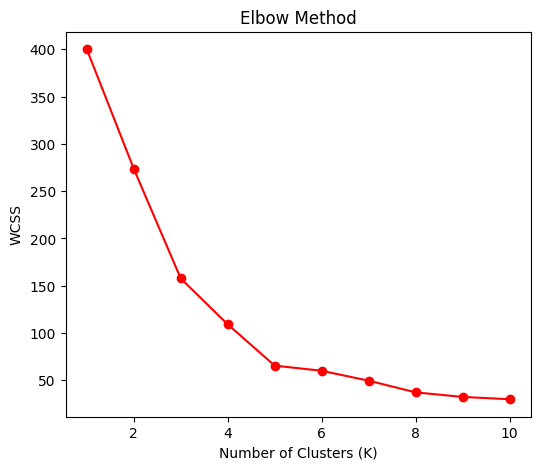

In [67]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features
X = data[["Annual Income (k$)", "Spending Score (1-100)"]]

# Scaling (recommended)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate WCSS for different K
wcss = []

for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    wcss.append(model.inertia_)

# Plot Elbow Graph
plt.figure(figsize=(6,5))
plt.plot(range(1,11), wcss, marker='o',color="red")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.show()

In [68]:
import joblib

# Save model
joblib.dump(rf_model, "random_forest_model.pkl")

# Save scaler (if used)
joblib.dump(scaler, "scaler.pkl")

print("Random Forest model saved successfully!")

Random Forest model saved successfully!


In [69]:
# Save dataset
data.to_csv("clustered_data_saved.csv", index=False)

print("Dataset saved successfully!")

Dataset saved successfully!


In [70]:
import joblib

joblib.dump(cluster, "kmeans_model.pkl")


['kmeans_model.pkl']